In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
computers_df = pd.read_csv("./data/computers.csv")
computers_df.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [4]:
print("Size of the data : ", computers_df.shape)

Size of the data :  (14, 2)


#### Fitting SImple Linear Regression Model using sklearn.linear_model.LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
linear_reg = LinearRegression()
linear_reg.fit(X = computers_df[["Units"]], y= computers_df[["Minutes"]])
# OR
#model.fit(X = computers_df.loc[:,["Units"]], y= computers_df.loc[:,["Minutes"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Fetching the coefficients

In [7]:
print("Intercept:", linear_reg.intercept_)
print("Coefficients:",linear_reg.coef_)

Intercept: [4.16165414]
Coefficients: [[15.50877193]]


#### Making predictions

In [8]:
predictions = linear_reg.predict(computers_df[["Units"]])
predictions

array([[ 19.67042607],
       [ 35.17919799],
       [ 50.68796992],
       [ 66.19674185],
       [ 66.19674185],
       [ 81.70551378],
       [ 97.21428571],
       [ 97.21428571],
       [112.72305764],
       [128.23182957],
       [143.7406015 ],
       [143.7406015 ],
       [159.24937343],
       [159.24937343]])

#### Visualizing the Fitted Model

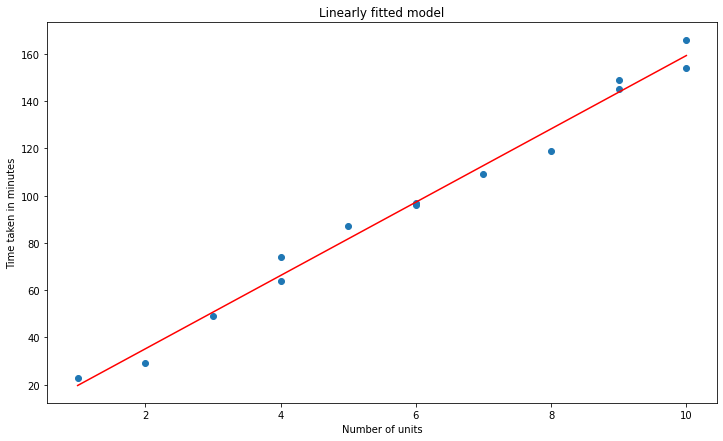

In [9]:
plt.figure(figsize=(12,7))
plt.scatter(x= "Units", y="Minutes", data = computers_df)
plt.plot(computers_df["Units"], predictions, 'r')
plt.title("Linearly fitted model")
plt.xlabel("Number of units")
plt.ylabel("Time taken in minutes")
plt.show()

### Computing various types of errors (Evaluation metrics)

#### 1. Mean Squared Error (MSE)

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
mse = mean_squared_error(computers_df["Units"], predictions)
print("Mean Squared Error of the model : ", mse)

Mean Squared Error of the model :  10034.15368779091


In [12]:
#manually
np.mean((computers_df["Units"] - predictions.ravel())**2)
# OR
#np.mean(np.square(computers_df["Units"] - predictions.ravel()))

10034.15368779091

#### 2. Root Mean Squared Error (RMSE)

In [13]:
rmse = np.sqrt(mean_squared_error(computers_df["Units"], predictions))
print("Root Mean Squared Error of the model : ", rmse)

Root Mean Squared Error of the model :  100.17062287812185


#### 3. Mean Absolute Error (MAE)

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
mae = mean_absolute_error(computers_df["Units"], predictions)
print("Mean Absolute Error of the model : ", mae)

Mean Absolute Error of the model :  91.21428571428571


In [16]:
#manually
np.mean(np.abs(computers_df["Units"] - predictions.ravel()))

91.21428571428571

#### 4. Mean Absolute Percentage Error (MAPE)

In [17]:
mape = np.mean(np.abs((computers_df["Units"] - predictions.ravel()) / predictions.ravel())) * 100
print("Mean Absolute Error of the model : ", mape)

Mean Absolute Error of the model :  93.94527192393178


### Linear Regression Assumption

#### 1. Validating the Linearity Assumption

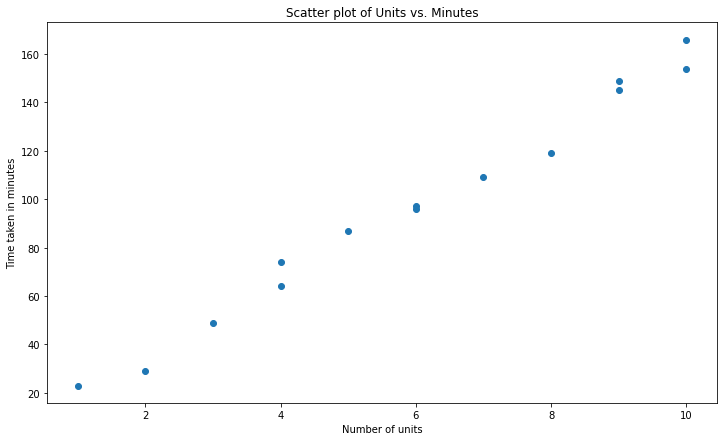

In [18]:
plt.figure(figsize=(12,7))
plt.scatter(x= "Units", y="Minutes", data = computers_df)
plt.title("Scatter plot of Units vs. Minutes")
plt.xlabel("Number of units")
plt.ylabel("Time taken in minutes")
plt.show()

Text(0.5, 1.0, 'Residual plot')

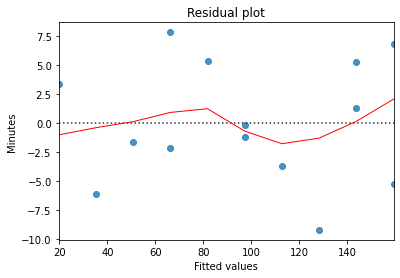

In [21]:
sns.residplot(predictions.reshape(-1),computers_df["Minutes"],lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

#### 2. Validating the Normality Assumption 

Text(0.5, 1.0, 'Normal Q-Q Plot')

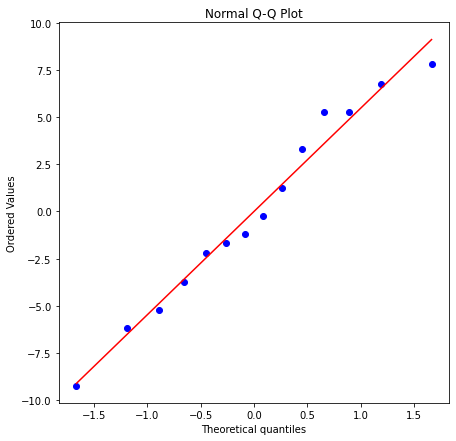

In [24]:
residuals = computers_df["Minutes"] - predictions.reshape(-1)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

#### 3. Validating Homoscedasticity Assumption

Text(0.5, 0, 'Fitted value')

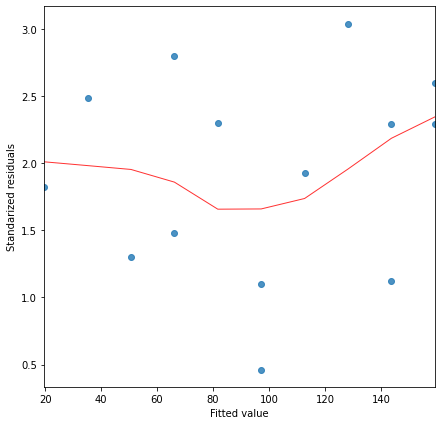

In [25]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))
plt.figure(figsize=(7,7))
sns.regplot(predictions.reshape(-1), model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")